<a href="https://colab.research.google.com/github/peterbabulik/synthetic/blob/main/Riemann_vs_Langlands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cirq --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.7/532.7 kB 32.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.5/60.5 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 596.5/596.5 kB 36.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.8/202.8 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

Using device: cuda


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Initializing Quantum Riemann-Langlands Analyzer...

Training the quantum model...


Training:   0%|          | 0/1 [00:00<?, ?it/s]

Epoch 0/1, Loss: 0.4223


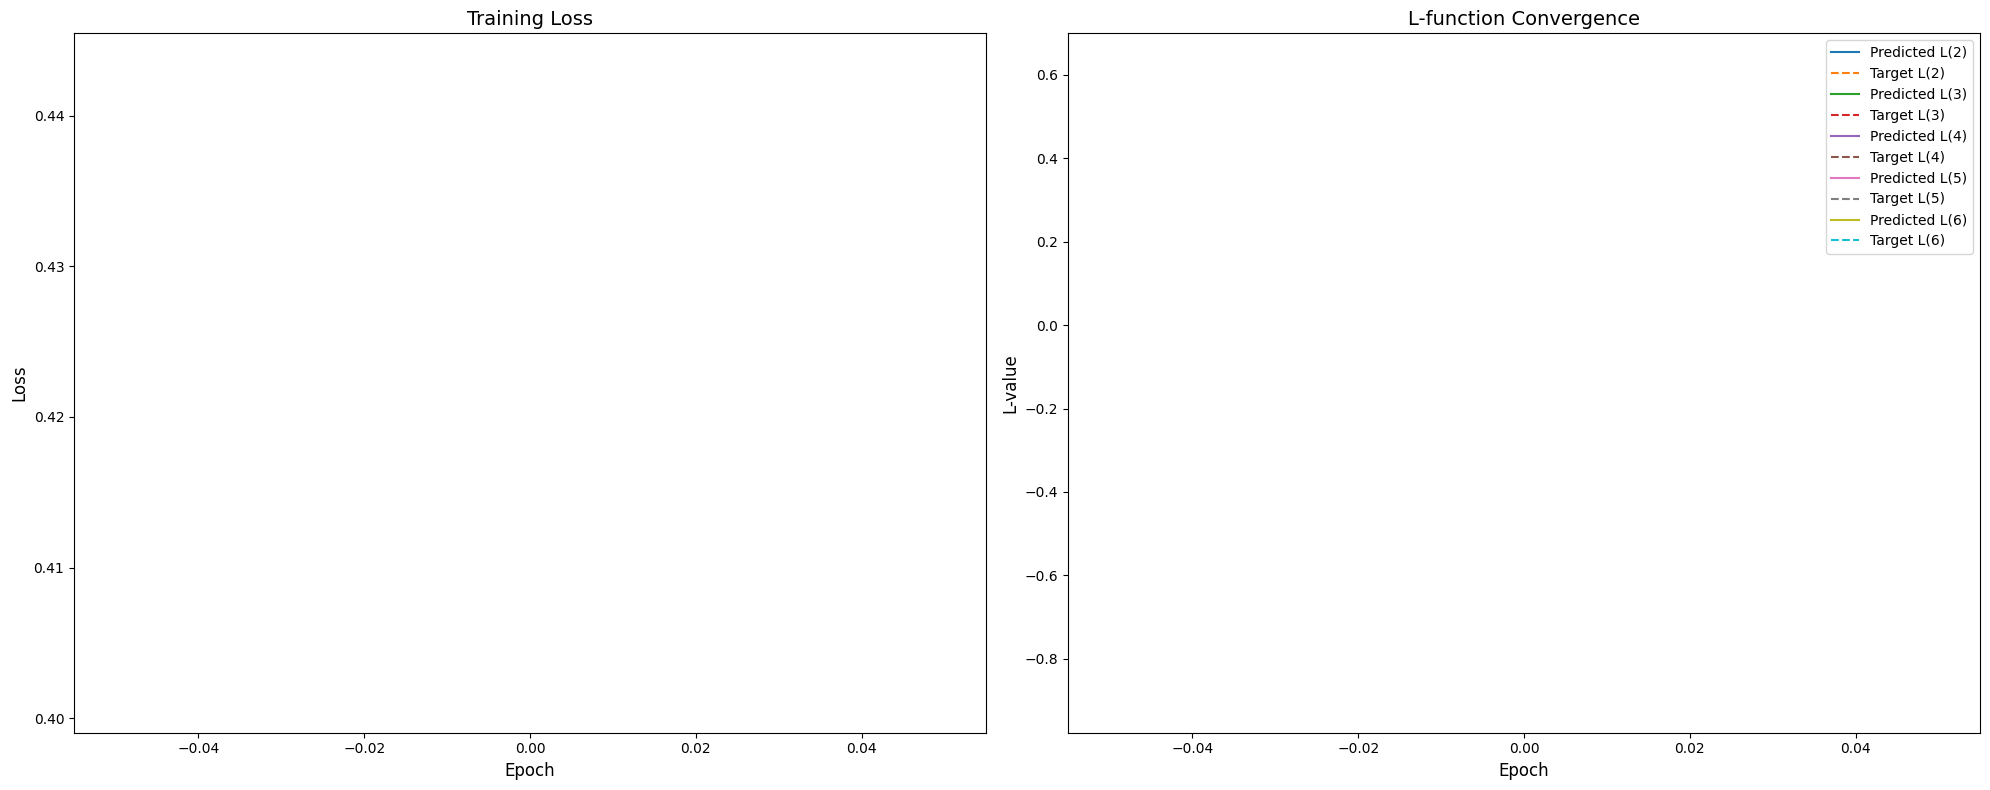


Generating Langlands fractal visualization...


Generating fractal points:   0%|          | 0/200 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
<ipython-input-7-f44e2abf0b6f>:188: RuntimeWarning: invalid value encountered in scalar multiply
  y = np.sin(i) * i * np.std(l_values.detach().cpu().numpy())
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:176: RuntimeWarning: overflow encounte

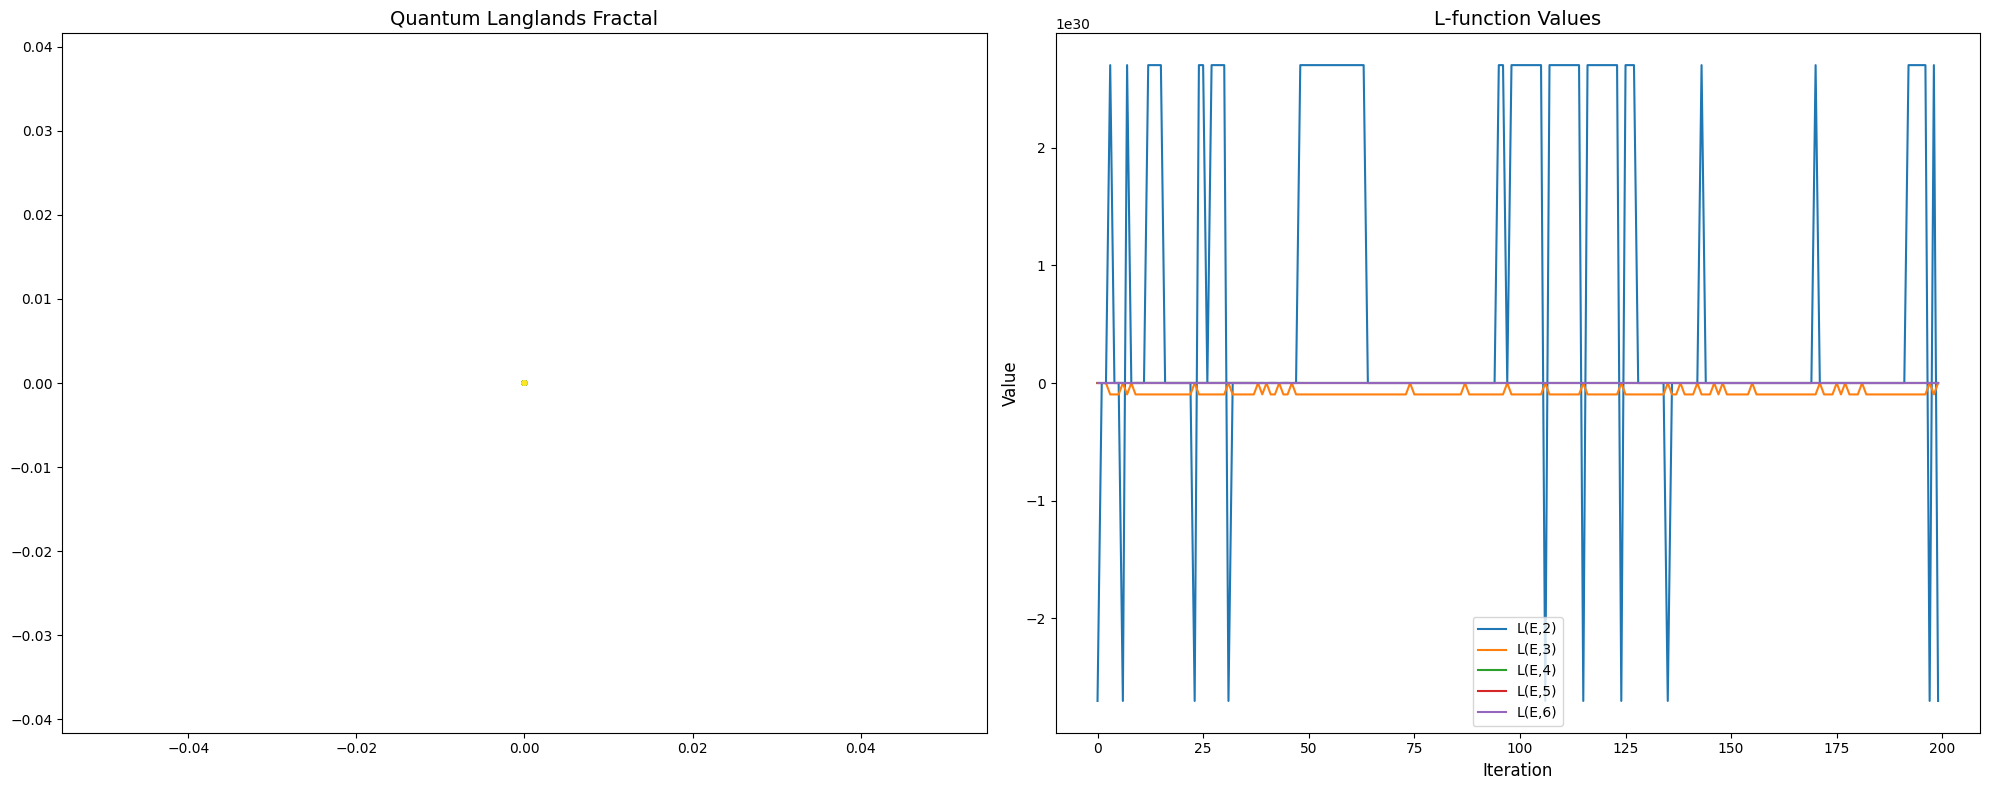

In [7]:

# !pip install cirq numpy matplotlib torch sympy tqdm

import cirq
import numpy as np
import matplotlib.pyplot as plt
import torch
import sympy as sp
from collections import defaultdict
import time
from IPython.display import display, Math, HTML
from tqdm.notebook import tqdm

# Set up device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Display setup information and introduction
display(HTML("""
<h1>Quantum Riemann-Langlands Program</h1>
<p>This notebook implements a quantum computing approach to exploring the connection between the Riemann Hypothesis and the Langlands Program.</p>
"""))

class RiemannZetaAnalyzer:
    def __init__(self, max_terms=10000):
        self.max_terms = max_terms
        self.critical_line = 0.5

    def approximate_zeta(self, s, num_terms=1000):
        terms = torch.tensor([1 / (n ** complex(s)) for n in range(1, num_terms + 1)], device=device)
        return torch.sum(terms)

    def find_zeros(self, t_min, t_max, num_points=1000):
        t_values = torch.linspace(t_min, t_max, num_points, device=device)
        zeta_values = torch.tensor([abs(self.approximate_zeta(complex(self.critical_line, t.item())))
                                   for t in t_values])

        potential_zeros = []
        for i in range(1, len(zeta_values) - 1):
            if zeta_values[i] < zeta_values[i-1] and zeta_values[i] < zeta_values[i+1]:
                potential_zeros.append(t_values[i].item())

        return potential_zeros

class RiemannQuantumCircuit:
    def __init__(self, num_qubits):
        self.num_qubits = num_qubits
        self.qubits = cirq.LineQubit.range(num_qubits)

    def create_riemann_circuit(self, t_value):
        circuit = cirq.Circuit()

        for i, qubit in enumerate(self.qubits):
            angle = 2 * np.pi * t_value / (2 ** (i+1))
            circuit.append(cirq.rz(rads=float(angle))(qubit))

        for i in range(self.num_qubits - 1):
            circuit.append(cirq.CNOT(self.qubits[i], self.qubits[i + 1]))

        return circuit

class AutomorphicForm:
    def __init__(self, weight, level):
        self.weight = weight
        self.level = level

    def fourier_expansion(self, n_terms=5):
        coefficients = [1/k for k in range(1, n_terms+1)]
        return coefficients

class GaloisRepresentation:
    def __init__(self, dimension, characteristic):
        self.dimension = dimension
        self.characteristic = characteristic

    def trace_frobenius(self, prime):
        return np.cos(2 * np.pi * prime / self.characteristic)

class QuantumRiemannLanglandsAnalyzer:
    def __init__(self, num_qubits=2):
        self.num_qubits = num_qubits
        self.qubits = cirq.LineQubit.range(num_qubits)
        self.noise_model = cirq.depolarize(p=0.01)

        self.riemann_analyzer = RiemannZetaAnalyzer()
        self.riemann_circuit = RiemannQuantumCircuit(num_qubits)

        self.theta = torch.nn.Parameter(torch.randn(num_qubits, device=device))
        self.quantum_scale = torch.nn.Parameter(torch.tensor([1.0], device=device))

        self.automorphic_dim = 4
        self.galois_group_order = 8
        self.field_characteristic = 7

        self.automorphic_form = AutomorphicForm(weight=2, level=1)
        self.galois_rep = GaloisRepresentation(dimension=2, characteristic=self.field_characteristic)

        self.optimizer = torch.optim.Adam([self.theta, self.quantum_scale], lr=0.09)

    def _create_riemann_langlands_circuit(self, input_data):
        circuit = cirq.Circuit()

        binary_data = format(input_data, f'0{self.num_qubits}b')
        for i, bit in enumerate(binary_data):
            if i < self.num_qubits and bit == '1':
                circuit.append(cirq.X(self.qubits[i]))

        t_value = float(input_data) / 10.0
        riemann_circuit = self.riemann_circuit.create_riemann_circuit(t_value)
        circuit.append(riemann_circuit)

        # Replace qft with individual Hadamard gates for simplicity
        for qubit in self.qubits:
            circuit.append(cirq.H(qubit))

        for i, qubit in enumerate(self.qubits):
            circuit.append(cirq.ry(rads=float(self.theta[i]))(qubit))
            circuit.append(cirq.rz(rads=float(np.pi * self.galois_rep.trace_frobenius(i+2)))(qubit))

        for i in range(self.num_qubits - 1):
            circuit.append(cirq.CNOT(self.qubits[i], self.qubits[i + 1]))

        circuit.append(cirq.measure(*self.qubits, key='result'))

        return circuit

    def encode_automorphic_form(self, data):
        data_int = int(data) if isinstance(data, (bytes, bytearray)) else data
        circuit = self._create_riemann_langlands_circuit(data_int)

        simulator = cirq.Simulator()
        result = simulator.run(circuit.with_noise(self.noise_model), repetitions=1)

        measurements = result.measurements['result'][0]
        return torch.tensor(measurements, device=device, dtype=torch.float32)

    def analyze_riemann_langlands_correspondence(self, quantum_state):
        quantum_state = quantum_state * self.quantum_scale

        zeros = self.riemann_analyzer.find_zeros(0, 30, num_points=100)

        l_values = []
        for p in range(2, 7):
            phase_factors = torch.cos(torch.tensor([2 * np.pi * p / (2**i) for i in range(1, self.num_qubits+1)],
                                                  device=device, dtype=torch.float32))
            eigenvalue = torch.sum(quantum_state * phase_factors)

            for zero in zeros:
                eigenvalue *= torch.abs(torch.tensor(p, device=device).float() - zero)

            l_values.append(eigenvalue)

        return torch.stack(l_values)

    def forward(self, data_point):
        quantum_state = self.encode_automorphic_form(data_point)
        return self.analyze_riemann_langlands_correspondence(quantum_state)

    def loss_function(self, output, target):
        return torch.mean((output - target)**2)

    def train_step(self, data_point):
        self.optimizer.zero_grad()
        output = self.forward(data_point)

        target_l_values = torch.tensor([self.galois_rep.trace_frobenius(p) for p in range(2, 7)],
                                      device=device, dtype=torch.float32)

        loss = self.loss_function(output, target_l_values)
        loss.backward()
        self.optimizer.step()

        return loss.item(), output.detach().cpu().numpy(), target_l_values.cpu().numpy()

class LanglandsFractalVisualizer:
    def __init__(self, quantum_analyzer):
        self.quantum_analyzer = quantum_analyzer
        self.points = []
        self.l_values = []

    def generate(self, iterations):
        self.points = []
        self.l_values = []
        for i in tqdm(range(iterations), desc="Generating fractal points"):
            l_values = self.quantum_analyzer.forward(i)
            self.l_values.append(l_values.detach().cpu().numpy())

            x = np.cos(i) * i * np.mean(l_values.detach().cpu().numpy())
            y = np.sin(i) * i * np.std(l_values.detach().cpu().numpy())
            self.points.append((x, y))

def plot_langlands_fractal(visualizer):
    plt.figure(figsize=(20, 8))

    plt.subplot(121)
    if visualizer.points:
        x_coords, y_coords = zip(*visualizer.points)
        plt.scatter(x_coords, y_coords, c=range(len(visualizer.points)), cmap='viridis', s=10)
    plt.title("Quantum Langlands Fractal", fontsize=14)
    plt.axis('equal')

    plt.subplot(122)
    if visualizer.l_values:
        l_values_array = np.array(visualizer.l_values)
        for i in range(l_values_array.shape[1]):
            plt.plot(l_values_array[:, i], label=f'L(E,{i+2})')
    plt.title("L-function Values", fontsize=14)
    plt.xlabel("Iteration", fontsize=12)
    plt.ylabel("Value", fontsize=12)
    plt.legend()

    plt.tight_layout()
    plt.show()

def display_mathematical_background():
    display(HTML("<h2>Mathematical Background</h2>"))
    display(Math(r"\text{1. Riemann Zeta Function: } \zeta(s) = \sum_{n=1}^{\infty} \frac{1}{n^s}"))
    display(Math(r"\text{2. Riemann Hypothesis: zeros of }\zeta(s)\text{ have real part }\frac{1}{2}"))
    display(Math(r"\text{3. Automorphic L-functions: } L(\pi, s) = \sum_{n=1}^{\infty} \frac{a_n}{n^s}"))
    display(Math(r"\text{4. Langlands Correspondence: } L(\pi, s) = L(\rho, s)"))

def train_and_visualize(quantum_analyzer, num_epochs=1, test_data=42):
    losses = []
    predicted_l_values = []
    target_l_values = []

    for epoch in tqdm(range(num_epochs), desc="Training"):
        loss, pred_l, target_l = quantum_analyzer.train_step(test_data)
        losses.append(loss)
        predicted_l_values.append(pred_l)
        target_l_values.append(target_l)

        if epoch % 50 == 0:
            print(f"Epoch {epoch}/{num_epochs}, Loss: {loss:.4f}")

    plt.figure(figsize=(20, 8))

    plt.subplot(121)
    plt.plot(losses)
    plt.title("Training Loss", fontsize=14)
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("Loss", fontsize=12)

    plt.subplot(122)
    predicted_l_array = np.array(predicted_l_values)
    target_l_array = np.array(target_l_values)
    for i in range(predicted_l_array.shape[1]):
        plt.plot(predicted_l_array[:, i], label=f'Predicted L({i+2})')
        plt.plot(target_l_array[:, i], '--', label=f'Target L({i+2})')
    plt.title("L-function Convergence", fontsize=14)
    plt.xlabel("Epoch", fontsize=12)
    plt.ylabel("L-value", fontsize=12)
    plt.legend()

    plt.tight_layout()
    plt.show()

def main():
    display_mathematical_background()

    print("Initializing Quantum Riemann-Langlands Analyzer...")
    quantum_analyzer = QuantumRiemannLanglandsAnalyzer()

    print("\nTraining the quantum model...")
    train_and_visualize(quantum_analyzer)

    print("\nGenerating Langlands fractal visualization...")
    fractal_visualizer = LanglandsFractalVisualizer(quantum_analyzer)
    fractal_visualizer.generate(200)
    plot_langlands_fractal(fractal_visualizer)

if __name__ == "__main__":
    main()